## CIFAR Using CNN 

#### Ahmad Pouramini, Benyamin Hosseini 

---



This is the implementatin of CIFAR using CNN.

Source: https://blog.plon.io/tutorials/cifar-10-classification-using-keras-tutorial/

Other Sources: https://appliedmachinelearning.blog/2018/03/24/achieving-90-accuracy-in-object-recognition-task-on-cifar-10-dataset-with-keras-convolutional-neural-networks/

Question PDF: https://drive.google.com/open?id=1sySPwALk8alK38ejbjCoN5fS_YSHaBPs


## Loading Data

Found GPU at:/device:GPU:0


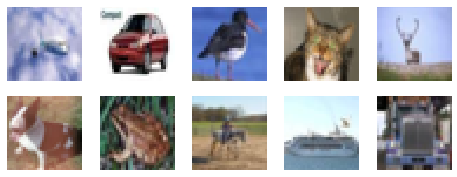

In [3]:
# Import all modules
from sklearn.model_selection import train_test_split
import time
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.optimizers import Adam
from keras.layers import Activation
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
# from keras_sequential_ascii import sequential_model_to_ascii_printout
from keras import backend as K
if K.backend()=='tensorflow':
    K.set_image_dim_ordering("th")

# Import Tensorflow with multiprocessing
import tensorflow as tf
import multiprocessing as mp

# Loading the CIFAR-10 datasets
from keras.datasets import cifar10

# GPU Processing
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at:{}'.format(device_name))

batch_size = 32 
# 32 examples in a mini-batch, smaller batch size means more updates in one epoch
 
num_classes = 10 #
# epochs = 100 # repeat 100 times

(x_train, y_train), (x_test, y_test) = cifar10.load_data() 

# x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.1)
# x_train - training data(images), y_train - labels(digits)

# Print figure with 10 random images from each
 
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(y_train[:]==i)[0]
    features_idx = x_train[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = np.transpose(features_idx[img_num,::],(1,2,0))
#   ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()


## Data Normalization

In [0]:
# Convert and pre-processing

y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)
#y_valid = np_utils.to_categorical(y_valid, num_classes)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
#x_valid = x_valid.astype('float32')
x_train  /= 255
x_test /= 255
#x_valid /= 255


# Creating the base model 1:
##Adam Optimizer

In [0]:
# Based on:
# github.com/abhijeet3922/Object-recognition-CIFAR-10/blob/master/cifar10.py
def base_model_Adam():  # 3 Convolutional layers + 1 hidden layer MLP
    model = Sequential()
   
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:], activation='relu'))  # first layer filters: 32 filters 3x3
    #model.add(Dropout(0.2))

    model.add(Conv2D(32, (3, 3), activation='relu'))  # second layer filters: 32 filters 3x3
    model.add(MaxPooling2D(pool_size=(2, 2)))  # second layer pooling: max pooling 2x2

    model.add(Conv2D(64, (3, 3), activation='relu'))  # third layer filters: 64 filters 3x3
    model.add(MaxPooling2D(pool_size=(2, 2)))  # third layer pooling: max pooling 2x2

    # MLP
    model.add(Flatten())
    #model.add(Dropout(0.2))
    model.add(Dense(512, activation='relu',kernel_constraint=maxnorm(3)))  # MLP first hidden layer neurons
    #model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation='softmax'))  # MLP output layer neurons
    
    epochs = 10 
    lrate = 0.01
    decay = lrate/epochs
    adam = Adam(lr=lrate, beta_1=0.9, beta_2=0.999, epsilon=None, decay=decay, amsgrad=False) # Adam optimizer

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Creating the base model 2:
##Gradient Descent Optimizer

In [0]:
# Based on:
# github.com/abhijeet3922/Object-recognition-CIFAR-10/blob/master/cifar10.py

def base_model_GD():  # 3 Convolutional layers + 1 hidden layer MLP
    model = Sequential()
   
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:], activation='relu'))  # first layer filters: 32 filters 3x3
    #model.add(Dropout(0.2))

    model.add(Conv2D(32, (3, 3), activation='relu'))  # second layer filters: 32 filters 3x3
    model.add(MaxPooling2D(pool_size=(2, 2)))  # second layer pooling: max pooling 2x2

    model.add(Conv2D(64, (3, 3), activation='relu'))  # third layer filters: 64 filters 3x3
    model.add(MaxPooling2D(pool_size=(2, 2)))  # third layer pooling: max pooling 2x2

    # MLP
    model.add(Flatten())
    #model.add(Dropout(0.2))
    model.add(Dense(512, activation='relu',kernel_constraint=maxnorm(3)))  # MLP first hidden layer neurons
    #model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation='softmax'))  # MLP output layer neurons
    
    epochs = 10 
    lrate = 0.01
    decay = lrate/epochs
    sgd = SGD(lr=lrate, decay=decay, momentum=0.9, nesterov=False)  # Stochastic Gradient Descent optimizer

    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

## The model summary

In [15]:
cnn_n1 = base_model_Adam()
cnn_n1.summary()

cnn_n2 = base_model_GD()
cnn_n2.summary()

# visualize model

# from keras_ascii_sequential import sequential_model_to_ascii_printout 

# sequential_model_to_ascii_printout(cnn_n)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 30, 30)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 32, 15, 15)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 64, 13, 13)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 64, 6, 6)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               1180160   
__________

## Training the Model

In [16]:
epochs = 10
cnn1 = cnn_n1.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=32)


Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 20s 409us/step - loss: 1.3248 - acc: 0.5248 - val_loss: 1.0263 - val_acc: 0.6445
Epoch 2/10
50000/50000 [==============================] - 20s 394us/step - loss: 0.9024 - acc: 0.6839 - val_loss: 0.8780 - val_acc: 0.6974
Epoch 3/10
50000/50000 [==============================] - 20s 391us/step - loss: 0.7240 - acc: 0.7454 - val_loss: 0.8373 - val_acc: 0.7184
Epoch 4/10
50000/50000 [==============================] - 20s 391us/step - loss: 0.5925 - acc: 0.7945 - val_loss: 0.7938 - val_acc: 0.7339
Epoch 5/10
50000/50000 [==============================] - 20s 390us/step - loss: 0.4706 - acc: 0.8367 - val_loss: 0.8600 - val_acc: 0.7238
Epoch 6/10
50000/50000 [==============================] - 20s 391us/step - loss: 0.3749 - acc: 0.8680 - val_loss: 0.8976 - val_acc: 0.7243
Epoch 7/10
50000/50000 [==============================] - 20s 392us/step - loss: 0.2989 - acc: 0.8954 - val_loss: 0.

In [17]:
cnn2 = cnn_n2.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=32)


Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 17s 340us/step - loss: 1.5657 - acc: 0.4323 - val_loss: 1.2376 - val_acc: 0.5607
Epoch 2/10
50000/50000 [==============================] - 17s 331us/step - loss: 1.1222 - acc: 0.6030 - val_loss: 1.0537 - val_acc: 0.6270
Epoch 3/10
50000/50000 [==============================] - 17s 333us/step - loss: 0.9224 - acc: 0.6767 - val_loss: 0.9731 - val_acc: 0.6690
Epoch 4/10
50000/50000 [==============================] - 17s 331us/step - loss: 0.7858 - acc: 0.7272 - val_loss: 0.9287 - val_acc: 0.6827
Epoch 5/10
50000/50000 [==============================] - 17s 331us/step - loss: 0.6764 - acc: 0.7675 - val_loss: 0.8780 - val_acc: 0.7052
Epoch 6/10
50000/50000 [==============================] - 17s 335us/step - loss: 0.5806 - acc: 0.8018 - val_loss: 0.8972 - val_acc: 0.7050
Epoch 7/10
50000/50000 [==============================] - 17s 331us/step - loss: 0.4974 - acc: 0.8313 - val_loss: 0.

## Results

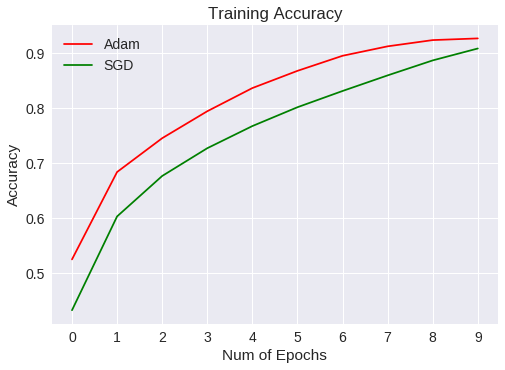

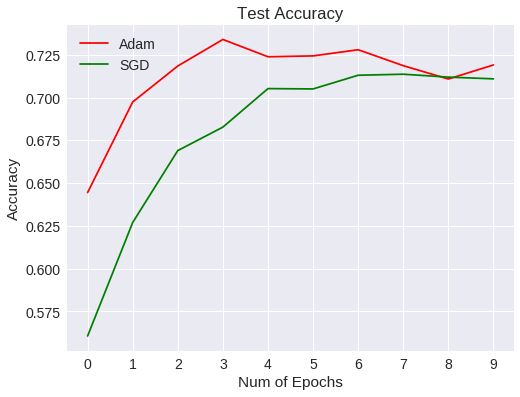

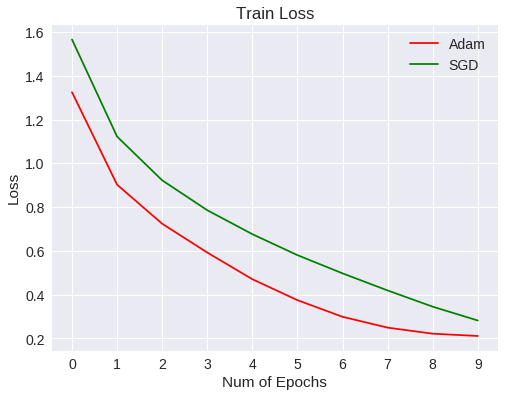

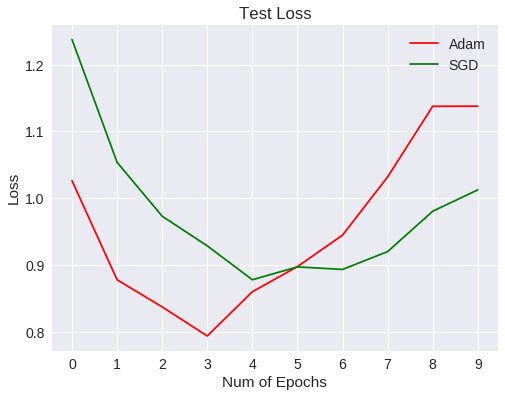

0 1000
1 1000
2 1000
3 1000
4 1000
5 1000
6 1000
7 1000
8 1000
9 1000
[[767   6  45  19  16  12  15  13  75  32]
 [ 25 831   6   6   3   7  19   3  40  60]
 [ 60   2 592  90  80  62  72  25  14   3]
 [ 23   4  76 549  47 203  63  17  11   7]
 [ 22   0  71  90 649  55  53  51   7   2]
 [ 15   1  59 201  31 632  23  28   8   2]
 [  9   2  39  69  22  22 823   5   6   3]
 [ 14   2  34  57  46  86  11 735   8   7]
 [ 68  22   8  20   6  10   9   9 827  21]
 [ 30  57  15  25   8  11  13  11  45 785]]


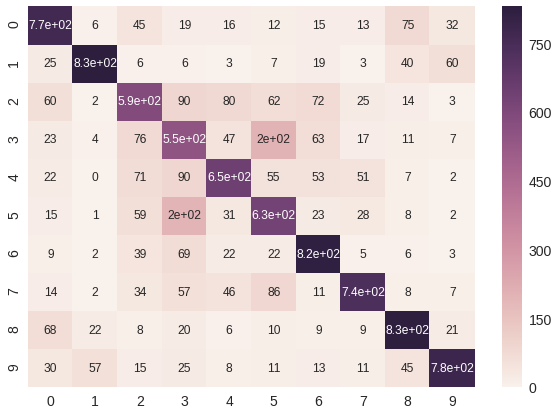

0 1000
1 1000
2 1000
3 1000
4 1000
5 1000
6 1000
7 1000
8 1000
9 1000
[[774  17  48  13  21   7  19   9  59  33]
 [ 24 819  16  13   3   2  16   5  31  71]
 [ 66   7 627  64  75  57  62  28  10   4]
 [ 20  13  72 549  63 157  70  35  10  11]
 [ 31   4  92  66 653  24  58  59   9   4]
 [ 16   3  70 197  44 577  35  50   5   3]
 [  5   3  50  56  33  24 811   3   5  10]
 [ 22   1  42  46  70  44  13 744   4  14]
 [ 77  37  14  16  10   5   9   7 803  22]
 [ 46 101  15  19   3   5  10  24  25 752]]


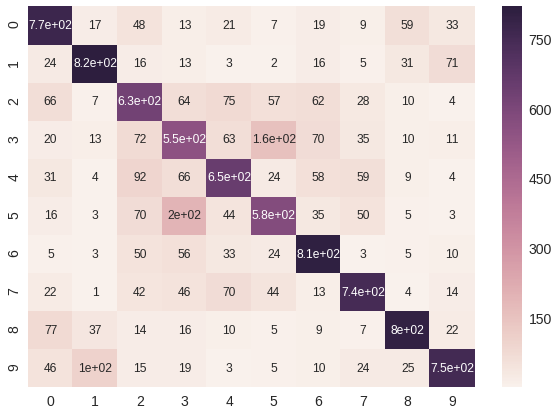

In [18]:
plt.figure(0)
plt.plot(cnn1.history['acc'],'r')
plt.plot(cnn2.history['acc'],'g')
plt.xticks(np.arange(0, epochs, 1.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy")
plt.legend(['Adam','SGD'])

plt.figure(1)
plt.plot(cnn1.history['val_acc'],'r')
plt.plot(cnn2.history['val_acc'],'g')
plt.xticks(np.arange(0, epochs, 1.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Test Accuracy")
plt.legend(['Adam','SGD'])

plt.figure(2)
plt.plot(cnn1.history['loss'],'r')
plt.plot(cnn2.history['loss'],'g')
plt.xticks(np.arange(0, epochs, 1.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Train Loss")
plt.legend(['Adam','SGD'])

plt.figure(3)
plt.plot(cnn1.history['val_loss'],'r')
plt.plot(cnn2.history['val_loss'],'g')
plt.xticks(np.arange(0, epochs, 1.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Test Loss")
plt.legend(['Adam','SGD'])
 
plt.show()


# Confusion matrix result

from sklearn.metrics import classification_report, confusion_matrix
Y_pred1 = cnn_n1.predict(x_test, verbose=2)
y_pred1 = np.argmax(Y_pred1, axis=1)

for ix in range(10):
    print(ix, confusion_matrix(np.argmax(y_test,axis=1),y_pred1)[ix].sum())
cm1 = confusion_matrix(np.argmax(y_test,axis=1),y_pred1)
print(cm1)

# Visualizing of confusion matrix
import seaborn as sn
import pandas  as pd


df_cm1 = pd.DataFrame(cm1, range(10),
                  range(10))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm1, annot=True,annot_kws={"size": 12})# font size
plt.show()

# Confusion matrix result 2

Y_pred2 = cnn_n2.predict(x_test, verbose=2)
y_pred2 = np.argmax(Y_pred2, axis=1)

for ix in range(10):
    print(ix, confusion_matrix(np.argmax(y_test,axis=1),y_pred2)[ix].sum())
cm2 = confusion_matrix(np.argmax(y_test,axis=1),y_pred2)
print(cm2)

# Visualizing of confusion matrix 2

df_cm2 = pd.DataFrame(cm2, range(10),
                  range(10))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm2, annot=True,annot_kws={"size": 12})# font size
plt.show()
